<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [142]:
# Check for GPU
!nvidia-smi

Thu Sep 14 11:06:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   1129MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [143]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Check this article:
https://www.v7labs.com/blog/computer-vision-applications#h5

-> In agriculture: for detecting pests or monitoring the maturity of the crops.

-> In autonomous driving: for detecting damage to the paviment, pedestrians, cars, traffic lights or traffic signs.

-> In defence and the military: for detecting weapons, recognizing specific individuals or in autopiloted drones.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when the model makes precise predictions on the training data but fails to perform well on new data, such as the test data. An overfitting model may provide inaccurate predictions and may not generalize effectively to different types of new data.


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

-> More data: Increasing the size of the dataset you are working with can often help prevent overfitting. It gives the model more diverse examples to learn from, making it harder for the model to memorize from the training data.

-> Simpler models: Specially useful when working with limited amounts of data. More complex models are more likely to overfitting when the data is scarce. So start small and gradually add complexity as needed.

-> Hyperparameter Tuning: Carefully tune hyperparameters like learning rate, batch size and regularization strength.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [144]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [145]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [146]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [147]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [148]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

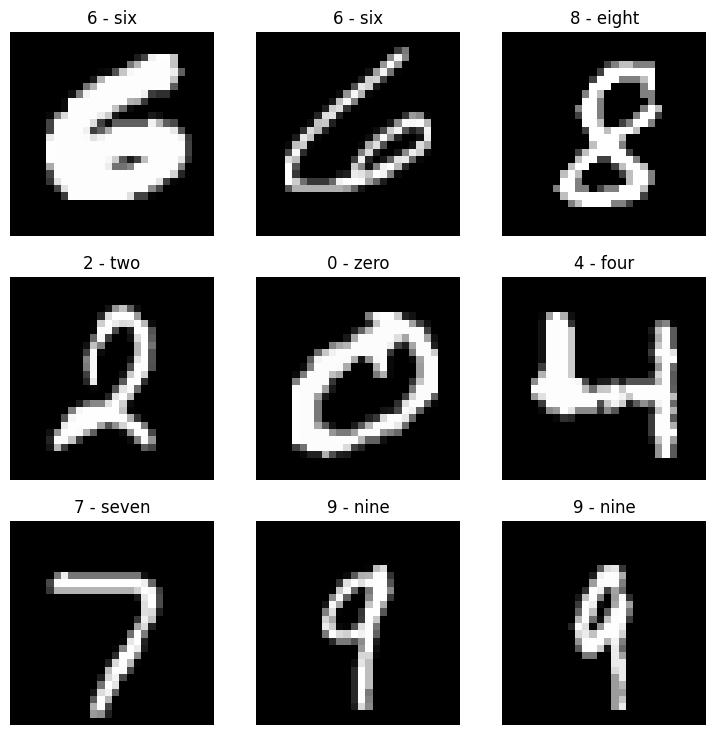

In [149]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [150]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x780ef81ab490>, <torch.utils.data.dataloader.DataLoader object at 0x780ef81a81f0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [151]:
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1
                      ),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2)
        )

        self.layer_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7,
                      out_features = output_shape)
        )

  def forward(self, x: torch.Tensor):
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = MNISTModelV0(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names))
model_0

MNISTModelV0(
  (layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [152]:
# First we create functions for train and test loops

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accurancy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    model.train()

    # Forward pass
    y_pred = model(X)

    # Calculate loss and other statistics
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accurancy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagate the loss
    loss.backward()

    # Optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [153]:
# First we create functions for train and test loops

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accurancy_fn,
               device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)

  model.eval()
  with torch.inference_mode():
    for batch, (X,y) in enumerate(data_loader):
      X, y = X.to(device), y.to(device)
      # Forward pass
      test_pred = model(X)

      # Calculate loss and other statistics
      test_loss += loss_fn(test_pred, y)
      test_acc += accurancy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [154]:
# We also define a loss function an optimizer and an accurancy function (imported)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [155]:
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

In [156]:
# Auxiliar function to print execution time
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device = device):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [157]:
# Now we make the bigger loop, for GPU
from tqdm.auto import tqdm

train_time_start_on_gpu = timer()

torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model_0,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_0,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_on_gpu = timer()
gpu_time = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.32078 | Train accuracy: 89.22%
Test loss: 0.07256 | Test accuracy: 97.81%
Epoch: 1
-------
Train loss: 0.08301 | Train accuracy: 97.44%
Test loss: 0.07017 | Test accuracy: 97.75%
Epoch: 2
-------
Train loss: 0.06447 | Train accuracy: 97.98%
Test loss: 0.05675 | Test accuracy: 98.05%
Train time on cuda: 35.117 seconds


In [158]:
# @title Texto de título predeterminado
# Now we make the bigger loop, for CPU
from tqdm.auto import tqdm

train_time_start_on_cpu = timer()

torch.manual_seed(42)

epochs = 0

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model_0,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device = 'cpu')

  test_step(model_0,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device = 'cpu')

train_time_end_on_cpu = timer()
cpu_time = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu)

0it [00:00, ?it/s]

Train time on cuda: 0.022 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [159]:
images = []
real_labels = []

for i in torch.randint(0, len(test_data)-1, (16,)):
  image = test_data[i.item()][0]
  label = test_data[i.item()][1]

  images.append(image)
  real_labels.append(label)

images = torch.stack(images)
real_labels = torch.tensor(real_labels)

real_labels
#images[0] == images[15]

tensor([7, 9, 3, 5, 6, 7, 2, 8, 7, 2, 9, 2, 5, 8, 1, 9])

In [160]:
def make_predictions(model:nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []

  model.eval()
  with torch.inference_mode():

    for sample in data:

      sample = sample.unsqueeze(dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [161]:
pred_probs = make_predictions(model_0, images)
pred_probs[:4]

tensor([[1.5826e-10, 1.0109e-07, 1.2486e-03, 1.0066e-04, 1.3070e-12, 2.1388e-10,
         1.7896e-15, 9.9865e-01, 1.1663e-06, 7.1459e-07],
        [2.7682e-06, 5.5056e-09, 4.6647e-07, 9.2418e-06, 4.4603e-06, 1.6790e-06,
         2.4914e-09, 1.3798e-06, 7.6558e-06, 9.9997e-01],
        [2.7200e-11, 9.6877e-07, 4.1978e-07, 9.9997e-01, 3.5479e-09, 5.7900e-07,
         4.7560e-15, 6.3442e-07, 9.3875e-07, 2.3287e-05],
        [3.2966e-11, 1.9549e-10, 7.6514e-11, 2.3852e-03, 7.2451e-10, 9.9760e-01,
         3.8971e-09, 1.1062e-10, 3.6239e-06, 1.1888e-05]], device='cuda:0')

In [162]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 9, 3, 5, 6, 7, 2, 8, 7, 2, 9, 2, 5, 8, 1, 9], device='cuda:0')

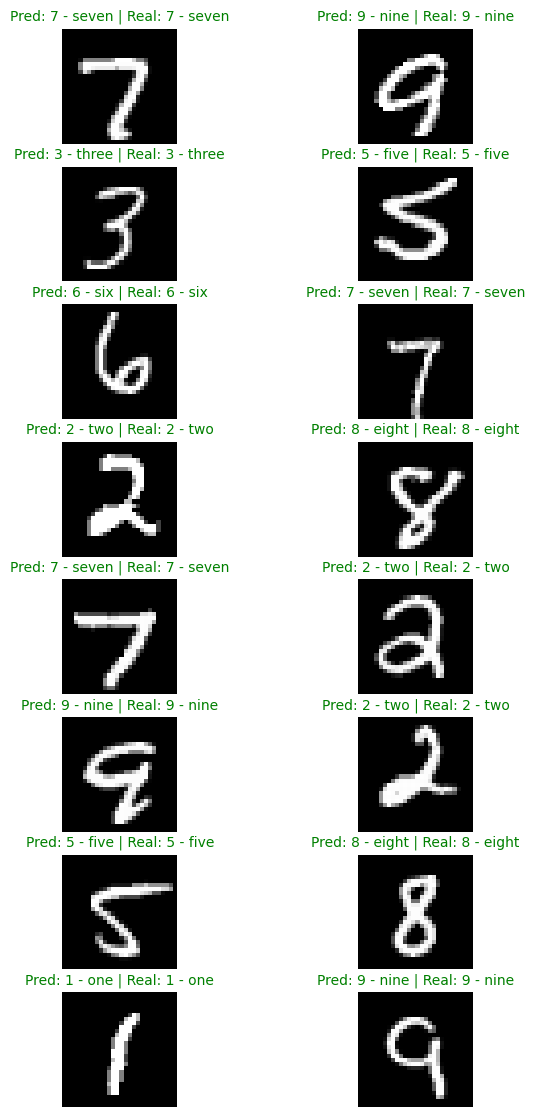

In [163]:
plt.figure(figsize=(7,14))
nrows = 8
ncols = 2
for i, image in enumerate(images):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(image.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  real_label = class_names[real_labels[i]]
  title_text = f"Pred: {pred_label} | Real: {real_label}"
  if pred_label == real_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [164]:
pred_probs = []
real_labels = []
for (X,y) in test_dataloader:
  pred_probs+=make_predictions(model_0, X)
  real_labels+=y

pred_probs = torch.stack(pred_probs)
pred_labels = pred_probs.argmax(dim=1)
real_labels = torch.tensor(real_labels)

In [165]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [166]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


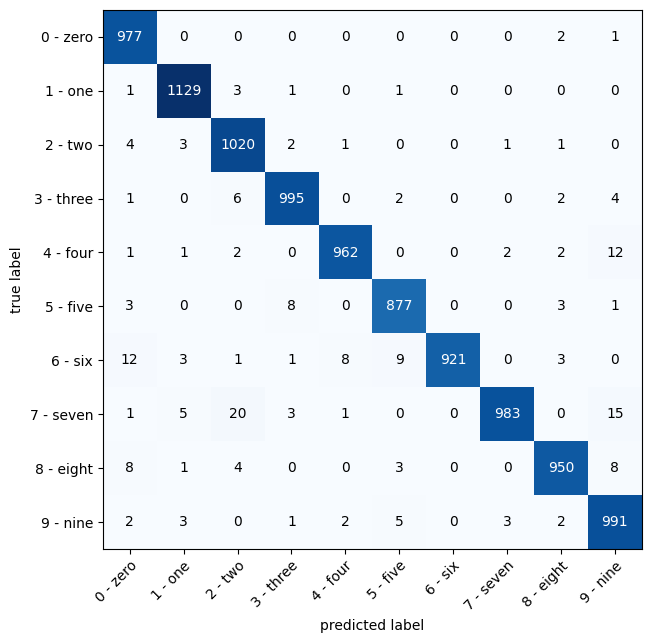

In [167]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = "multiclass")
confmat_tensor = confmat(preds = pred_labels.cpu(),
                         target = real_labels.cpu())

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = (10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [168]:
# kernel_size measures the size of the grid used to cover the full sourface of the image
# that we are compressing.
# Example: The random image has 3 colour channels and 64 pixels of heigth and width.
# So when we use kernel_size 64, the resulting image is of 1x1 pixel.
# Reducing the kernel_size will increase the size of the compressed image,
# because of the needed steps to cover all the image.

random = torch.rand(size = (1,3,64,64))
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 62,
                       stride = 2)

random_conv = conv_layer(random)
random_conv.shape

torch.Size([1, 10, 2, 2])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [169]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [170]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [171]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

In [176]:
# Now we make the bigger loop, for GPU
from tqdm.auto import tqdm

train_time_start_on_gpu = timer()

torch.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model_0,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_0,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_on_gpu = timer()
gpu_time = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.52219 | Train accuracy: 81.19%
Test loss: 0.41335 | Test accuracy: 85.11%
Epoch: 1
-------
Train loss: 0.36861 | Train accuracy: 86.86%
Test loss: 0.35383 | Test accuracy: 87.63%
Epoch: 2
-------
Train loss: 0.32823 | Train accuracy: 88.27%
Test loss: 0.34305 | Test accuracy: 87.74%
Epoch: 3
-------
Train loss: 0.30579 | Train accuracy: 88.91%
Test loss: 0.30700 | Test accuracy: 88.86%
Epoch: 4
-------
Train loss: 0.29202 | Train accuracy: 89.50%
Test loss: 0.30229 | Test accuracy: 89.15%
Train time on cuda: 58.952 seconds


In [178]:
pred_probs = []
real_labels = []
for (X,y) in test_dataloader:
  pred_probs+=make_predictions(model_0, X)
  real_labels+=y

pred_probs = torch.stack(pred_probs)
pred_labels = pred_probs.argmax(dim=1)
real_labels = torch.tensor(real_labels)

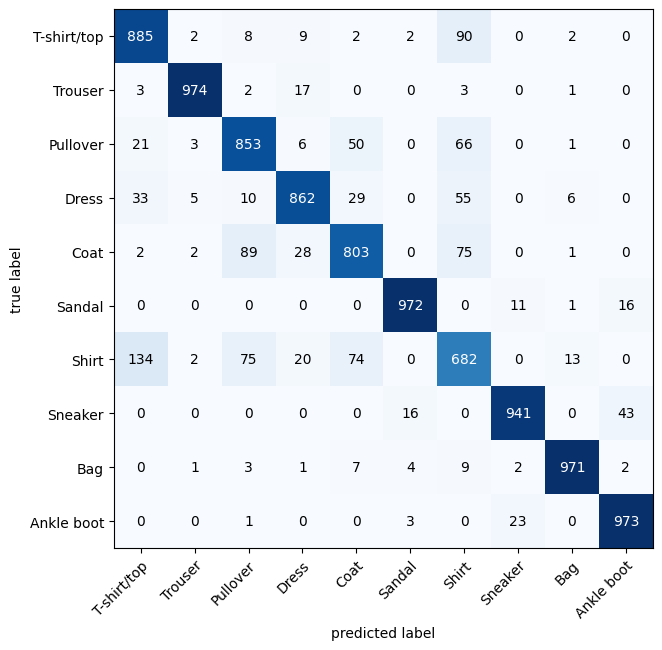

In [179]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = "multiclass")
confmat_tensor = confmat(preds = pred_labels.cpu(),
                         target = real_labels.cpu())

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = (10,7))